In [1]:
#Import Libraries


import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates

from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Read xls File and Load to a dataframe

df = pd.read_excel('Hclean_weather2015_2020.xlsx')
#print(df)
df = df.drop(columns = df.columns[15:])
df = df.drop(columns = df.columns[0:2])
df = df.dropna()
df

,Station,Timestamp,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²)
0,Hemlock,2015-04-08 12:30:00,2015-04-08,12:30:00,1023.15,4.792,72.8,0.3,0.0,0.00,242.9,0.74,24.4
1,Hemlock,2015-04-08 13:00:00,2015-04-08,13:00:00,1023.05,4.454,76.2,0.6,0.0,0.00,5.6,0.56,19.4
2,Hemlock,2015-04-08 13:30:00,2015-04-08,13:30:00,1022.65,3.985,80.6,1.0,0.0,0.19,33.7,0.74,25.6
3,Hemlock,2015-04-08 14:00:00,2015-04-08,14:00:00,1022.65,3.827,87.6,2.0,0.0,0.00,51.9,0.74,29.4
4,Hemlock,2015-04-08 14:30:00,2015-04-08,14:30:00,1022.35,3.591,89.7,2.1,0.0,0.00,22.5,0.56,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83237,Hemlock,2020-07-13 08:30:00,2020-07-13,08:30:00,1001.95,23.088,87.8,21.0,0.0,0.00,95.5,0.00,11.9
83238,Hemlock,2020-07-13 09:00:00,2020-07-13,09:00:00,1001.85,23.545,83.8,20.7,0.0,0.00,95.5,0.56,14.4
83239,Hemlock,2020-07-13 09:30:00,2020-07-13,09:30:00,1001.75,24.436,82.3,21.2,0.0,0.00,95.5,0.37,21.9
83240,Hemlock,2020-07-13 10:00:00,2020-07-13,10:00:00,1001.85,25.137,79.2,21.3,0.0,0.00,96.9,0.56,29.4


In [3]:
#cooerce time stamps to str
df['Time'] = df['Time'].astype(str)
#df["Date"] = pd.to_datetime(df["Date"]).dt.date
#df['Barometric Pressure (mbar)'] = df['Barometric Pressure (mbar)'].astype(str)
df.describe()

,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²)
count,83242.000000,83242.000000,83242.000000,83242.000000,83242.000000,83242.000000,83242.000000,83242.000000,83242.000000
mean,1010.415702,10.989395,76.707740,6.790404,0.096078,0.294818,190.360723,1.011158,14.371051
std,8.136720,9.843465,19.456583,10.539974,8.070332,0.513440,102.639265,1.298407,35.127193
min,660.050000,-24.709000,14.700000,-28.700000,0.000000,0.000000,0.000000,0.000000,0.600000
25%,1005.450000,3.063000,62.125000,-1.200000,0.000000,0.000000,103.900000,0.000000,0.600000
50%,1010.450000,11.953000,80.100000,7.900000,0.000000,0.000000,220.400000,0.560000,0.600000
75%,1015.550000,18.771000,94.500000,15.700000,0.000000,0.370000,280.800000,1.480000,16.900000
max,1038.550000,34.308000,100.000000,27.500000,1040.380000,47.310000,355.200000,46.760000,1275.600000


In [4]:
#Separate years
#df2014 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2015 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2016 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2016-03-01", "2016-04-30")])]
df2017 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2017-03-01", "2017-04-30")])]
df2018 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2018-03-01", "2018-04-30")])]
df2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2019-03-01", "2019-04-30")])]
df2020 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2020-03-01", "2020-04-30")])]
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df2015_2018

,Station,Timestamp,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²)
0,Hemlock,2015-04-08 12:30:00,2015-04-08,12:30:00,1023.15,4.792,72.8,0.3,0.0,0.00,242.9,0.74,24.4
1,Hemlock,2015-04-08 13:00:00,2015-04-08,13:00:00,1023.05,4.454,76.2,0.6,0.0,0.00,5.6,0.56,19.4
2,Hemlock,2015-04-08 13:30:00,2015-04-08,13:30:00,1022.65,3.985,80.6,1.0,0.0,0.19,33.7,0.74,25.6
3,Hemlock,2015-04-08 14:00:00,2015-04-08,14:00:00,1022.65,3.827,87.6,2.0,0.0,0.00,51.9,0.74,29.4
4,Hemlock,2015-04-08 14:30:00,2015-04-08,14:30:00,1022.35,3.591,89.7,2.1,0.0,0.00,22.5,0.56,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49673,Hemlock,2018-04-30 21:30:00,2018-04-30,21:30:00,1008.95,7.845,79.5,4.5,0.0,0.19,331.3,0.93,0.6
49674,Hemlock,2018-04-30 22:00:00,2018-04-30,22:00:00,1008.85,6.914,81.9,4.0,0.0,0.37,99.7,0.93,0.6
49675,Hemlock,2018-04-30 22:30:00,2018-04-30,22:30:00,1008.95,6.661,85.5,4.4,0.0,0.00,123.5,0.37,0.6
49676,Hemlock,2018-04-30 23:00:00,2018-04-30,23:00:00,1008.85,5.719,87.8,3.9,0.0,0.19,122.1,0.74,0.6


/Users/Sofia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Sofia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


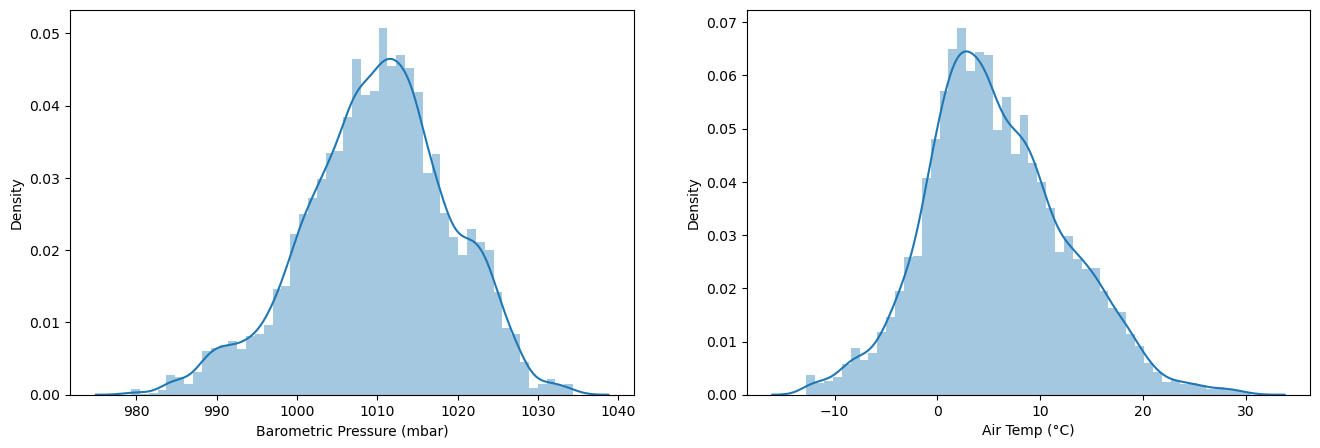

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2015_2018['Barometric Pressure (mbar)'])
plt.subplot(1,2,2)
sns.distplot(df2015_2018['Air Temp (°C)'])
plt.show()

/Users/Sofia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

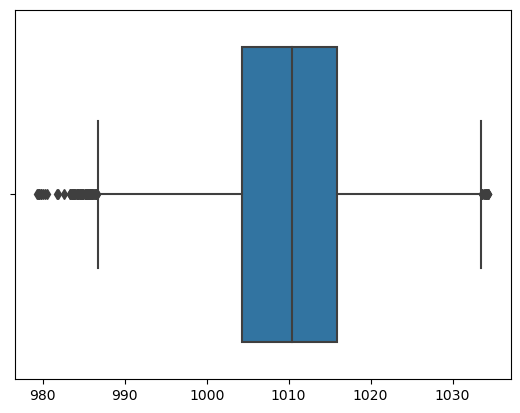

In [7]:
sns.boxplot(df2015_2018['Barometric Pressure (mbar)'].values)

/Users/Sofia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

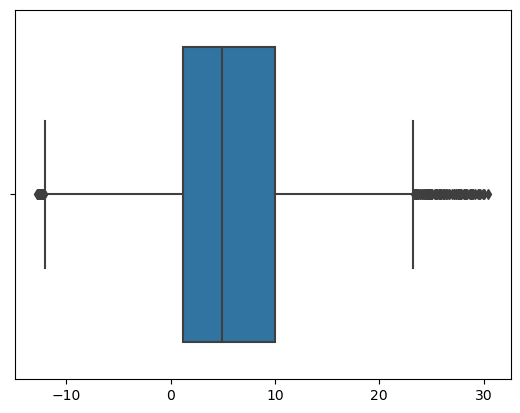

In [8]:
sns.boxplot(df2015_2018['Air Temp (°C)'].values)

### Delet Outlier for Air Temp (°C)

In [9]:
#Finding the IQR
percentile25 = df2015_2018['Air Temp (°C)'].quantile(0.25)
percentile75 = df2015_2018['Air Temp (°C)'].quantile(0.75)

In [10]:
#Finding the upper and lower limits
IQR = percentile75 -percentile25
upper_limit = percentile75 + (1.5 * IQR)
lower_limit = percentile25 - (1.5 * IQR)

In [11]:
#Step-7: Finding outliers
df2015_2018[df2015_2018['Air Temp (°C)'] > upper_limit]
df2015_2018[df2015_2018['Air Temp (°C)'] < lower_limit]

,Station,Timestamp,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²)
29509,Hemlock,2017-03-05 01:00:00,2017-03-05,01:00:00,1027.95,-12.123,40.3,-22.9,0.0,0.74,315.9,2.97,0.6
29510,Hemlock,2017-03-05 01:30:00,2017-03-05,01:30:00,1028.05,-12.196,41.2,-22.7,0.0,0.56,335.5,2.23,0.6
29511,Hemlock,2017-03-05 02:00:00,2017-03-05,02:00:00,1028.05,-12.417,41.6,-22.8,0.0,0.19,306.1,1.67,0.6
29512,Hemlock,2017-03-05 02:30:00,2017-03-05,02:30:00,1027.95,-12.454,41.8,-22.8,0.0,0.37,311.7,1.86,0.6
29513,Hemlock,2017-03-05 03:00:00,2017-03-05,03:00:00,1027.75,-12.565,41.9,-22.8,0.0,0.74,292.0,2.41,0.6
29514,Hemlock,2017-03-05 03:30:00,2017-03-05,03:30:00,1027.65,-12.751,41.9,-23.0,0.0,0.56,289.2,2.04,0.6
29515,Hemlock,2017-03-05 04:00:00,2017-03-05,04:00:00,1027.85,-12.676,42.3,-22.8,0.0,0.37,251.3,1.67,0.6
29516,Hemlock,2017-03-05 04:30:00,2017-03-05,04:30:00,1028.15,-12.602,42.1,-22.8,0.0,0.56,280.8,1.48,0.6
29517,Hemlock,2017-03-05 05:00:00,2017-03-05,05:00:00,1028.15,-12.565,42.0,-22.8,0.0,0.74,320.1,2.41,0.6
29518,Hemlock,2017-03-05 05:30:00,2017-03-05,05:30:00,1028.15,-12.565,43.0,-22.5,0.0,0.74,306.1,2.04,0.6


In [12]:
#Step-8: Trimming outliers
new_df_2015_2018 = df2015_2018[ df2015_2018['Air Temp (°C)']>lower_limit]
new_df_2015_2018 = new_df_2015_2018[new_df_2015_2018['Air Temp (°C)']<upper_limit]
new_df_2015_2018.shape

(8985, 13)

/Users/Sofia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Sofia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Sofia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes

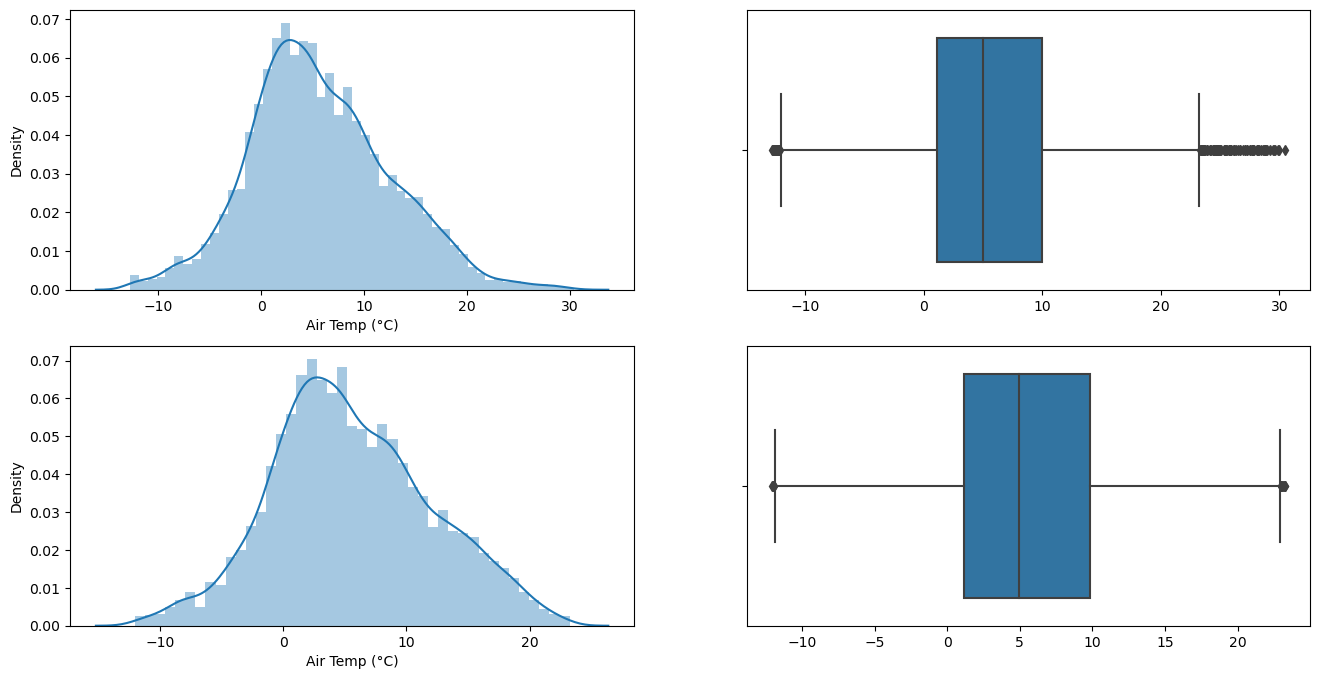

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2015_2018['Air Temp (°C)'])
plt.subplot(2,2,2)
sns.boxplot(df2015_2018['Air Temp (°C)'].values)
plt.subplot(2,2,3)
sns.distplot(new_df_2015_2018['Air Temp (°C)'])
plt.subplot(2,2,4)
sns.boxplot(new_df_2015_2018['Air Temp (°C)'].values)
plt.show()

### Case 2-'Barometric Pressure (mbar)'

0.0031790226349910355
42.87599400074964


Text(0, 0.5, 'Air Temp (°C)')

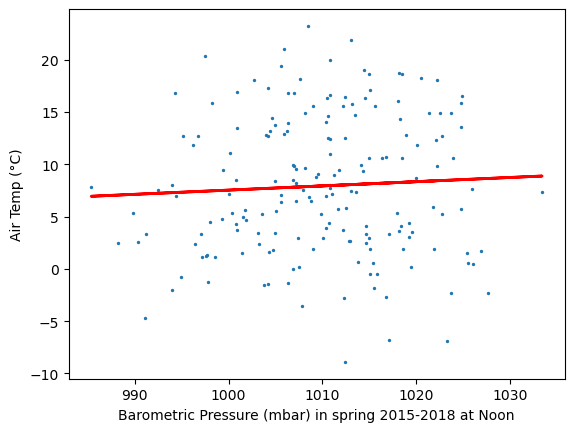

In [14]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_18_noon = new_df_2015_2018[new_df_2015_2018["Time"]== '12:00:00']

pre15_18 = df15_18_noon['Barometric Pressure (mbar)']
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
pre15_18 = pre15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pre15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)


plt.scatter(pre15_18,temp15_18_noon, s=2)
plt.plot(pre15_18, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")

-0.024485235154440232
49.92092810815686


(array([ 980.,  990., 1000., 1010., 1020., 1030.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

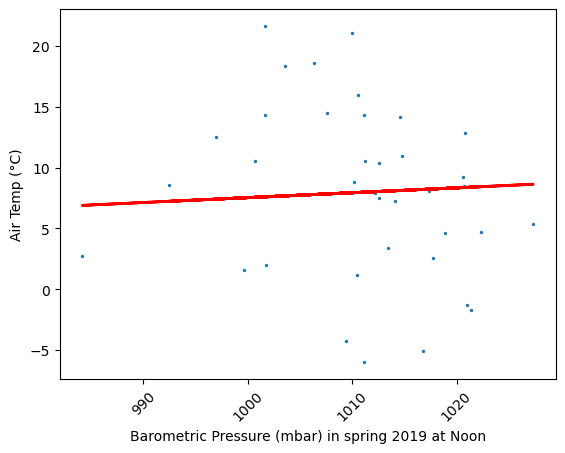

In [15]:
##Plot dates by temps for 2020
#df20_19 =pd.concat([df2019,df2020,df2018])
df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre2019_noon = df2019_noon['Barometric Pressure (mbar)']
temp2019_noon = df2019_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2019_noon = pre2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2019_noon, temp2019_noon, s = 2)
plt.plot(pre2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)


### Case 1: Date

0.12776765364410514
37.517096548742735


Text(0, 0.5, 'Air Temp (°C)')

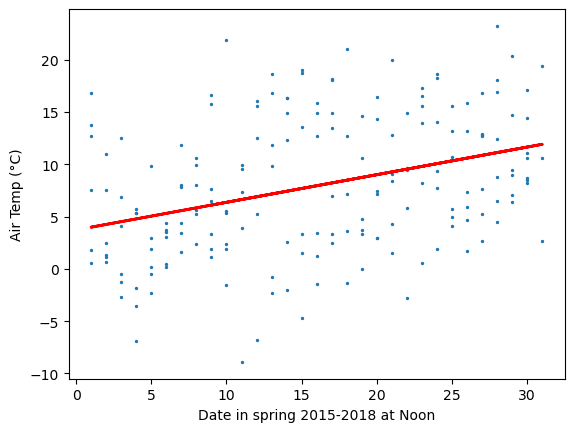

In [16]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_18_noon = new_df_2015_2018[new_df_2015_2018["Time"]== '12:00:00']

date15_18_noon = df15_18_noon['Date']
temp15_18_noon = df15_18_noon['Air Temp (°C)']

date15_18_noon = date15_18_noon.astype(str)
date15_18_noon = date15_18_noon.str.split("-").str[-1].astype(int)

# convert to 2-D array
date15_18_noon = date15_18_noon.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(date15_18_noon,temp15_18_noon)
temp15_18_noon_pred = model.predict(date15_18_noon)
#list to store number of predictor variables
predictors=[]

#list to store model scores
MSE_scores=[]
R2_scores=[]

MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

predictors.append(1)
MSE_scores.append(MSE)
R2_scores.append(R2)
plt.scatter(date15_18_noon,temp15_18_noon, s=2)
plt.plot(date15_18_noon, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Date in spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")

0.2746810122886998
35.34321022748416


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

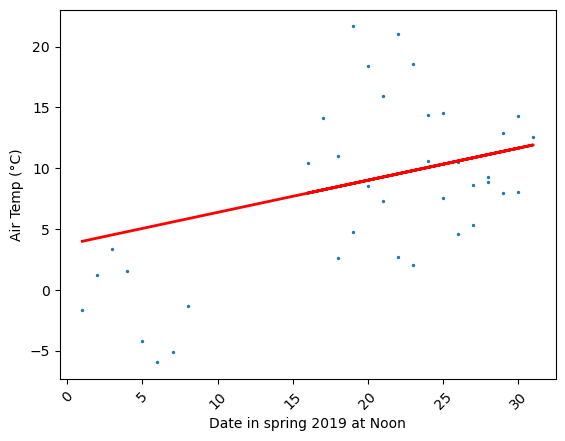

In [17]:
##Plot dates by temps for 2020
#df20_19 =pd.concat([df2019,df2020,df2018])
df2019_noon = df2019[df2019["Time"]== '12:00:00']

date2019_noon = df2019_noon['Date']
temp2019_noon = df2019_noon['Air Temp (°C)']

date2019_noon = date2019_noon.astype(str)
date2019_noon = date2019_noon.str.split("-").str[-1].astype(int)

date2019_noon = date2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(date2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(date2019_noon, temp2019_noon, s = 2)
plt.plot(date2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Date in spring 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 3- Gust Speed (m/s)

0.02017105176992673
42.145120397772395


Text(0, 0.5, 'Air Temp (°C)')

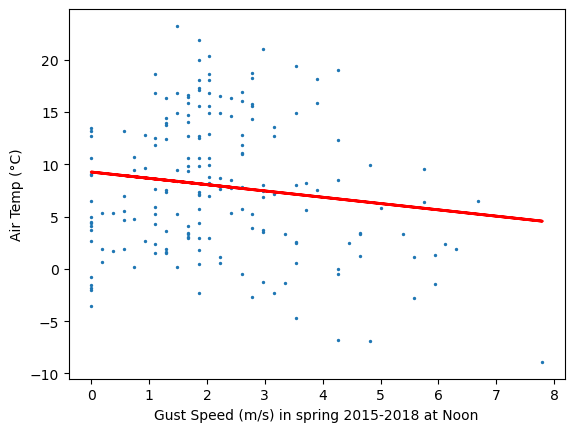

In [18]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_18_noon = new_df_2015_2018[new_df_2015_2018["Time"]== '12:00:00']

gSpeed15_18 = df15_18_noon['Gust Speed (m/s)']
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
gSpeed15_18 = gSpeed15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(gSpeed15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)


plt.scatter(gSpeed15_18,temp15_18_noon, s=2)
plt.plot(gSpeed15_18, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")

0.048407639022833515
46.369017542210976


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

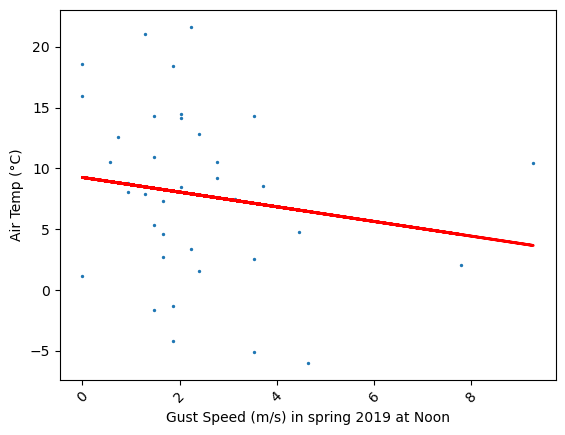

In [19]:
df2019_noon = df2019[df2019["Time"]== '12:00:00']

gSpeed2019_noon = df2019_noon['Gust Speed (m/s)']
temp2019_noon = df2019_noon['Air Temp (°C)']

gSpeed2019_noon = gSpeed2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)

temp2019_noon_pred = model.predict(gSpeed2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(gSpeed2019_noon, temp2019_noon, s = 2)
plt.plot(gSpeed2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 4 : Barometric Pressure (mbar) and Gust Speed (m/s)

In [20]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_18_noon = new_df_2015_2018[new_df_2015_2018["Time"]== '12:00:00']

gSpeed_BP_15_18 = df15_18_noon[['Gust Speed (m/s)','Barometric Pressure (mbar)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
gSpeed_BP_15_18 = gSpeed_BP_15_18.to_numpy().reshape(-1,2)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed_BP_15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(gSpeed_BP_15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)


0.02230375784550853
42.0533868819472


In [21]:
df2019_noon = df2019[df2019["Time"]== '12:00:00']

gSpeed_BP_2019_noon = df2019_noon[['Gust Speed (m/s)','Barometric Pressure (mbar)']]
temp2019_noon = df2019_noon['Air Temp (°C)']

gSpeed_BP_2019_noon = gSpeed_BP_2019_noon.to_numpy().reshape(-1,2)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)

temp2019_noon_pred = model.predict(gSpeed_BP_2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

0.028304163449641262
47.34861600237046


### Case 5: Barometric Pressure (mbar), Gust Speed (m/s), Wind Speed (m/s)

In [22]:
# plot linear regression

df15_18_noon = new_df_2015_2018[new_df_2015_2018["Time"]== '12:00:00']

pre15_18 = df15_18_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
pre15_18 = pre15_18.to_numpy().reshape(-1,3)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pre15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

0.03627095252688861
41.4526196740287


In [23]:
df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre2019_noon = df2019_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp2019_noon = df2019_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2019_noon = pre2019_noon.to_numpy().reshape(-1,3)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

0.055212738450006515
46.0374199089649


### Wind speed and Barometric Pressure


In [24]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_18_noon = new_df_2015_2018[new_df_2015_2018["Time"]== '12:00:00']

WSpeed_BP_15_18 = df15_18_noon[['Wind Speed (m/s)','Barometric Pressure (mbar)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
wSpeed_BP_15_18 = WSpeed_BP_15_18.to_numpy().reshape(-1,2)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(WSpeed_BP_15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(WSpeed_BP_15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)


0.011741645500802811
42.507692194345346


In [25]:
df2019_noon = df2019[df2019["Time"]== '12:00:00']

wSpeed_BP_2019_noon = df2019_noon[['Wind Speed (m/s)','Barometric Pressure (mbar)']]
temp2019_noon = df2019_noon['Air Temp (°C)']

wSpeed_BP_2019_noon = wSpeed_BP_2019_noon.to_numpy().reshape(-1,2)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)

temp2019_noon_pred = model.predict(wSpeed_BP_2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

-0.01085327060598007
49.256672246925206


/Users/Sofia/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Drew Point


0.011741645500802811
42.507692194345346


Text(0, 0.5, 'Air Temp (°C)')

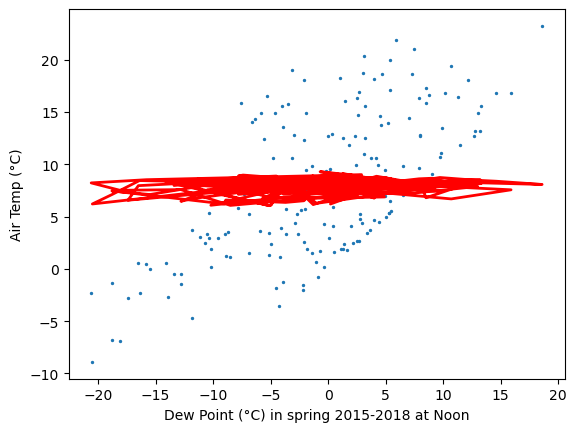

In [26]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_18_noon = new_df_2015_2018[new_df_2015_2018["Time"]== '12:00:00']

dPoint15_18 = df15_18_noon['Dew Point (°C)']
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
dPoint15_18 = dPoint15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(dPoint15_18,temp15_18_noon)
temp15_19_noon_pred = model.predict(dPoint15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)


plt.scatter(dPoint15_18,temp15_18_noon, s=2)
plt.plot(dPoint15_18, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Dew Point (°C) in spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")

0.6721755724413692
15.974168410328565


(array([-20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

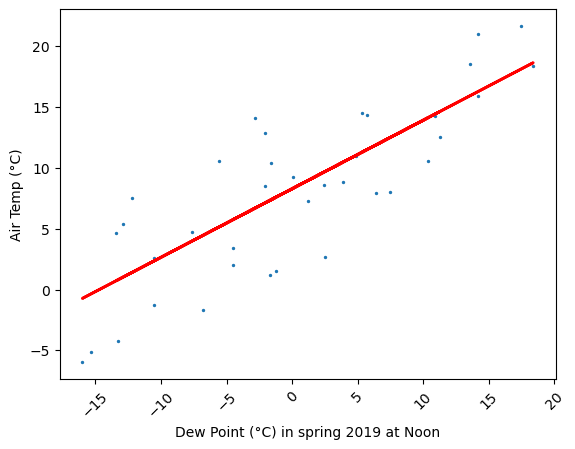

In [27]:
df2019_noon = df2019[df2019["Time"]== '12:00:00']

dPoint2019_noon = df2019_noon['Dew Point (°C)']
temp2019_noon = df2019_noon['Air Temp (°C)']

dPoint2019_noon = dPoint2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)

temp2019_noon_pred = model.predict(dPoint2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(dPoint2019_noon, temp2019_noon, s = 2)
plt.plot(dPoint2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Dew Point (°C) in spring 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)